In [2]:
import gymnasium as gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
import random
from tqdm import tqdm 
import imageio
import matplotlib.pyplot as plt
import os, sys 

In [3]:
def create_video(agent, env, filename="cartpole_dqn_video.mp4"):
    state, _ = env.reset()
    state = np.reshape(state, [1, agent.state_size])
    frames = []
    for time in range(500):
        frames.append(env.render())
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        next_state = np.reshape(next_state, [1, agent.state_size])
        state = next_state
        if done:
            break

    imageio.mimsave(filename, frames, fps=30)


def plot_metrics(scores, epsilons):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(scores)
    plt.title('Score per Episode vs Episode')
    plt.xlabel('Episode')
    plt.ylabel('Score')

    plt.subplot(2, 1, 2)
    plt.plot(epsilons)
    plt.title('Epsilon vs Episode')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')

    plt.tight_layout()
    plt.savefig('metrics.png')
    plt.show()

In [7]:

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=10000)
        self.gamma = 0.95  # discount factor
        self.epsilon = 1.0  # exploration-exploitation trade-off
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # model = Sequential()
        # model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        # model.add(Dense(24, activation='relu'))
        # model.add(Dense(self.action_size, activation='linear'))
        # model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        model = Sequential()
        model.add(Dense(512, input_dim = self.state_size, activation = 'relu'))
        model.add(Dense(256, activation = 'relu'))
        model.add(Dense(128, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        model.compile(optimizer = RMSprop(lr = self.learning_rate, rho = 0.95, epsilon = 0.01), loss = "mse", metrics = ['accuracy'])
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        states, targets = [], []
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            if done:
                target = reward
            else:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            # append to arrays 
            states.append(state[0])
            targets.append(target_f[0])

        # Convert lists to NumPy arrays for efficiency
        states = np.array(states)
        targets = np.array(targets)

        # Fit the model using the entire batch
        self.model.fit(states, targets, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save_weights(self):
        self.model.save_weights("dqn_weights.h5")

  0%|          | 0/100 [00:00<?, ?it/s]

episode: 0/100, score: 22, e: 1.0


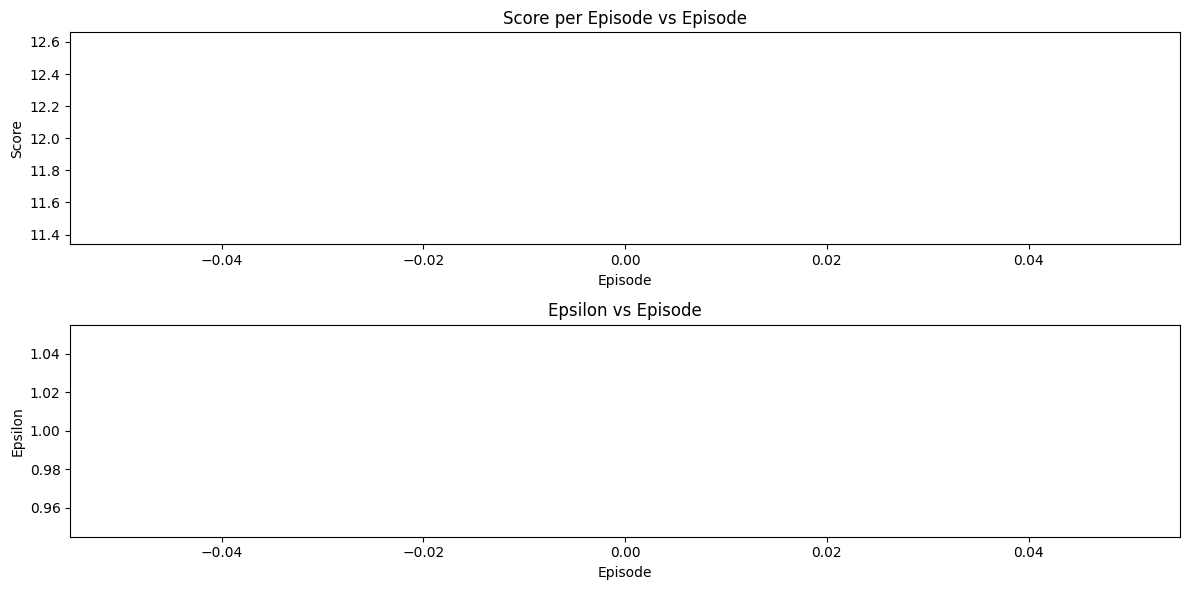

  1%|          | 1/100 [00:00<01:11,  1.39it/s]

episode: 1/100, score: 41, e: 1.0
1/1 [==============================] - 0s 22ms/step


  3%|▎         | 3/100 [00:47<28:33, 17.67s/it]

episode: 2/100, score: 53, e: 0.97
1/1 [==============================] - 0s 22ms/step


  4%|▍         | 4/100 [01:18<35:18, 22.07s/it]

episode: 3/100, score: 37, e: 0.95
1/1 [==============================] - 0s 19ms/step


  5%|▌         | 5/100 [01:41<35:16, 22.28s/it]

episode: 4/100, score: 24, e: 0.94
1/1 [==============================] - 0s 27ms/step


  6%|▌         | 6/100 [02:04<35:19, 22.55s/it]

episode: 5/100, score: 26, e: 0.92
1/1 [==============================] - 0s 19ms/step


  7%|▋         | 7/100 [02:19<31:22, 20.24s/it]

episode: 6/100, score: 17, e: 0.91
1/1 [==============================] - 0s 18ms/step


  8%|▊         | 8/100 [02:32<27:52, 18.18s/it]

episode: 7/100, score: 11, e: 0.9
1/1 [==============================] - 0s 21ms/step


  9%|▉         | 9/100 [02:53<28:55, 19.07s/it]

episode: 8/100, score: 28, e: 0.89
1/1 [==============================] - 0s 22ms/step


 10%|█         | 10/100 [03:08<26:21, 17.57s/it]

episode: 9/100, score: 12, e: 0.88
1/1 [==============================] - 0s 22ms/step
episode: 10/100, score: 15, e: 0.87


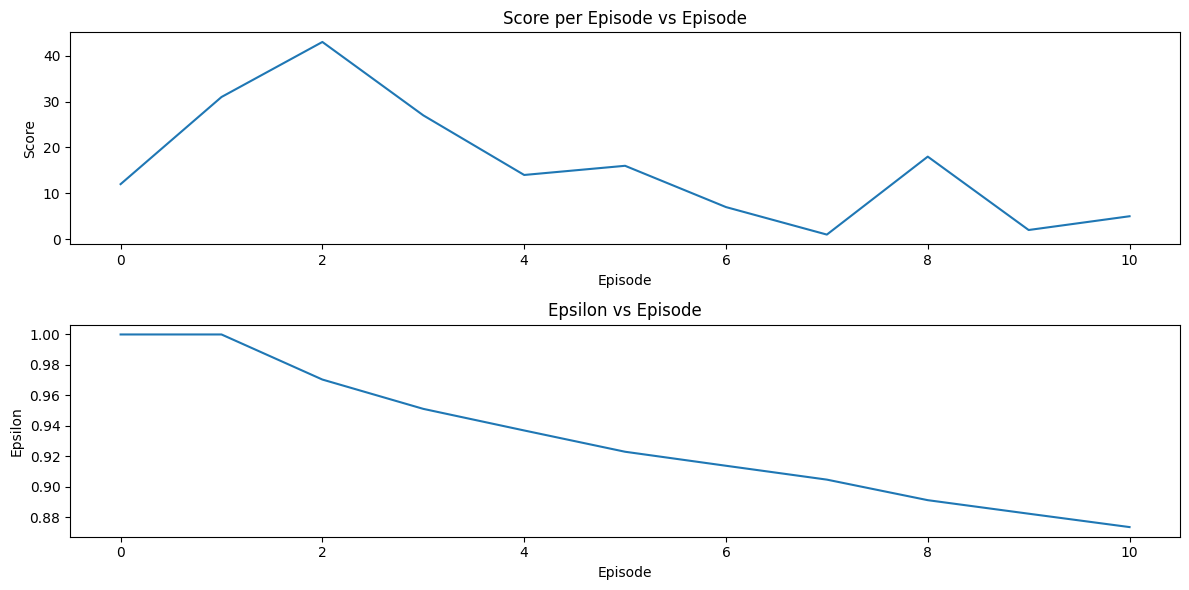

 11%|█         | 11/100 [03:24<25:38, 17.29s/it]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 12/100 [03:48<28:14, 19.26s/it]

episode: 11/100, score: 30, e: 0.86
1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 13/100 [04:12<30:00, 20.70s/it]

episode: 12/100, score: 23, e: 0.85
1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 14/100 [04:28<27:46, 19.38s/it]

episode: 13/100, score: 16, e: 0.84
1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 15/100 [04:36<22:36, 15.96s/it]

episode: 14/100, score: 10, e: 0.83
1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 16/100 [04:45<19:08, 13.67s/it]

episode: 15/100, score: 10, e: 0.83
1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 17/100 [05:02<20:20, 14.70s/it]

episode: 16/100, score: 11, e: 0.82
1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 18/100 [05:25<23:43, 17.35s/it]

episode: 17/100, score: 25, e: 0.81
1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 19/100 [05:41<22:36, 16.75s/it]

episode: 18/100, score: 12, e: 0.8
1/1 [==============================] - 0s 18ms/step


 20%|██        | 20/100 [06:23<32:24, 24.31s/it]

episode: 19/100, score: 44, e: 0.78
1/1 [==============================] - 0s 35ms/step
episode: 20/100, score: 11, e: 0.77


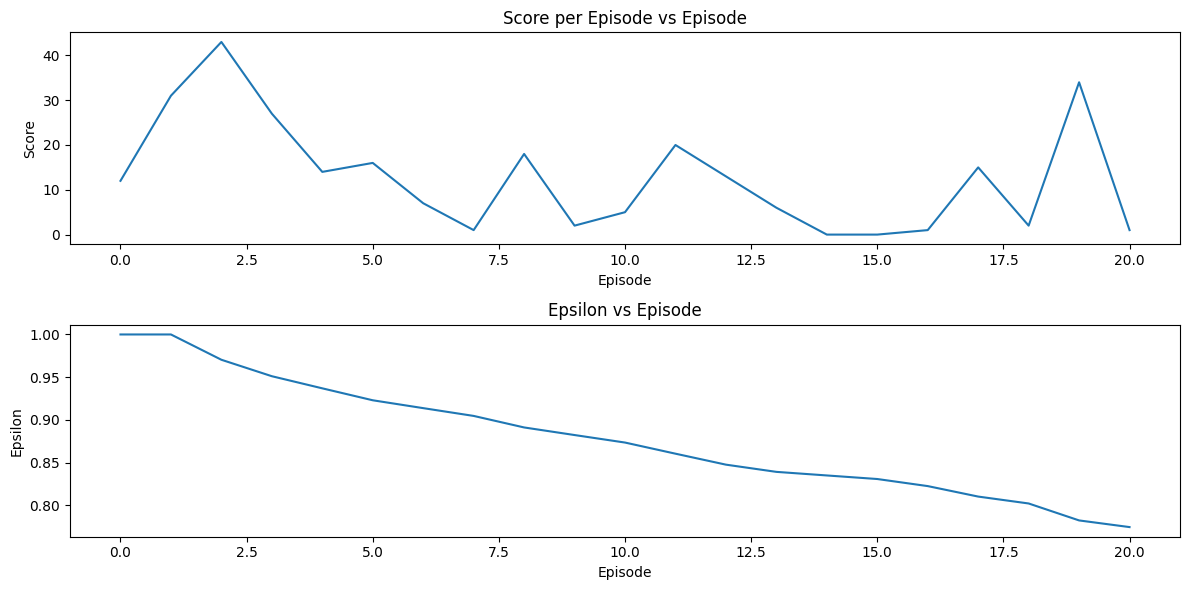

1/1 [==============================] - 0s 21ms/step


 21%|██        | 21/100 [06:41<29:29, 22.39s/it]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 22/100 [06:57<26:38, 20.49s/it]

episode: 21/100, score: 17, e: 0.77
1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 23/100 [07:13<24:48, 19.33s/it]

episode: 22/100, score: 19, e: 0.76
1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 24/100 [07:30<23:18, 18.40s/it]

episode: 23/100, score: 12, e: 0.75
1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 25/100 [07:47<22:35, 18.07s/it]

episode: 24/100, score: 14, e: 0.74
1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 26/100 [08:04<21:57, 17.81s/it]

episode: 25/100, score: 13, e: 0.74
1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 27/100 [08:29<24:26, 20.09s/it]

episode: 26/100, score: 21, e: 0.73
1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 28/100 [08:46<22:50, 19.03s/it]

episode: 27/100, score: 12, e: 0.72
1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 29/100 [08:55<18:51, 15.93s/it]

episode: 28/100, score: 9, e: 0.71
1/1 [==============================] - 0s 26ms/step


 30%|███       | 30/100 [09:11<18:37, 15.96s/it]

episode: 29/100, score: 12, e: 0.71
1/1 [==============================] - 0s 22ms/step
episode: 30/100, score: 7, e: 0.7


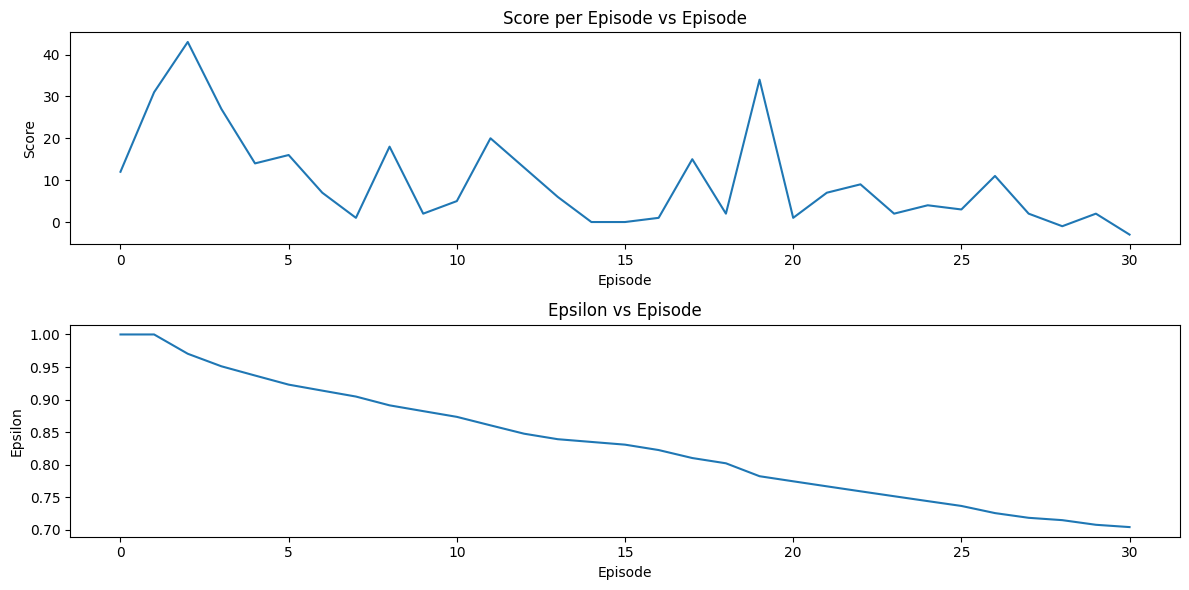

1/1 [==============================] - 0s 25ms/step


 31%|███       | 31/100 [09:21<16:16, 14.16s/it]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 32/100 [09:29<14:04, 12.42s/it]

episode: 31/100, score: 8, e: 0.7
1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 33/100 [09:45<15:02, 13.47s/it]

episode: 32/100, score: 17, e: 0.69
1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 34/100 [10:01<15:46, 14.34s/it]

episode: 33/100, score: 13, e: 0.69
1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 35/100 [10:27<19:13, 17.75s/it]

episode: 34/100, score: 25, e: 0.68
1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 36/100 [10:44<18:41, 17.53s/it]

episode: 35/100, score: 13, e: 0.67
1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 37/100 [11:01<18:09, 17.29s/it]

episode: 36/100, score: 12, e: 0.66
1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 38/100 [11:18<17:49, 17.25s/it]

episode: 37/100, score: 13, e: 0.66
1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 39/100 [11:34<17:09, 16.87s/it]

episode: 38/100, score: 20, e: 0.65
1/1 [==============================] - 0s 20ms/step


 40%|████      | 40/100 [11:50<16:38, 16.64s/it]

episode: 39/100, score: 16, e: 0.64
1/1 [==============================] - 0s 18ms/step
episode: 40/100, score: 12, e: 0.64


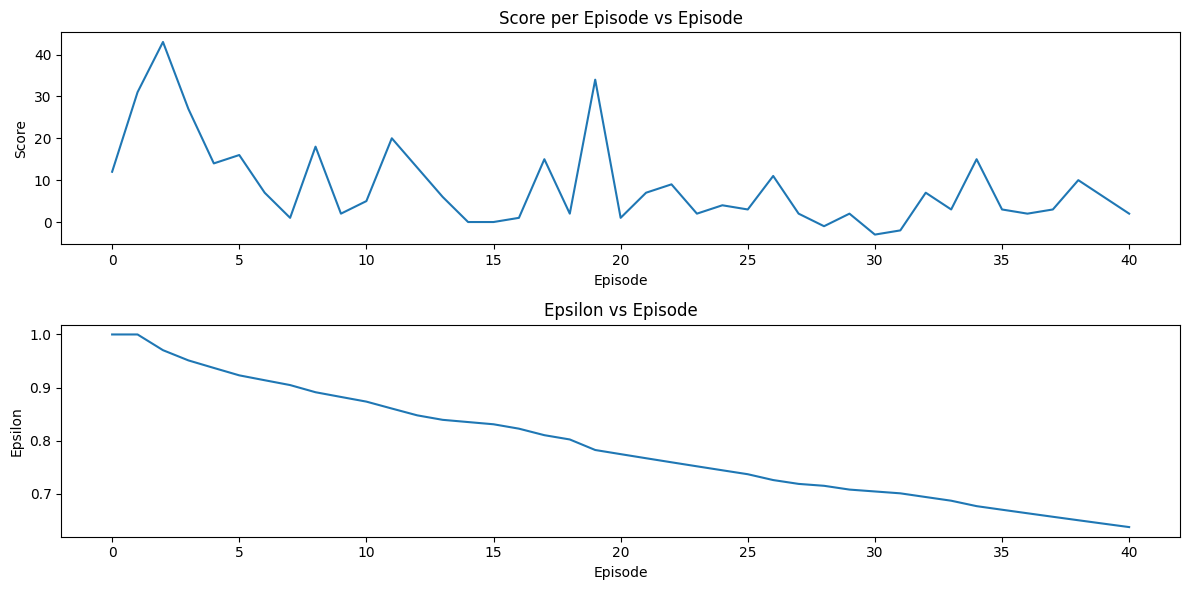

1/1 [==============================] - 0s 25ms/step


 41%|████      | 41/100 [12:08<16:36, 16.90s/it]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 42/100 [12:23<15:59, 16.55s/it]

episode: 41/100, score: 17, e: 0.63
1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 43/100 [12:39<15:20, 16.16s/it]

episode: 42/100, score: 12, e: 0.62
1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 44/100 [12:55<15:03, 16.14s/it]

episode: 43/100, score: 12, e: 0.62
1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 45/100 [13:11<14:48, 16.15s/it]

episode: 44/100, score: 15, e: 0.61
1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 46/100 [13:35<16:42, 18.57s/it]

episode: 45/100, score: 22, e: 0.6
1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 47/100 [13:43<13:29, 15.27s/it]

episode: 46/100, score: 10, e: 0.6
1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 48/100 [13:58<13:14, 15.27s/it]

episode: 47/100, score: 14, e: 0.59
1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 49/100 [14:13<12:55, 15.20s/it]

episode: 48/100, score: 17, e: 0.59
1/1 [==============================] - 0s 18ms/step


 50%|█████     | 50/100 [14:29<12:47, 15.35s/it]

episode: 49/100, score: 13, e: 0.58
1/1 [==============================] - 0s 23ms/step
episode: 50/100, score: 26, e: 0.57


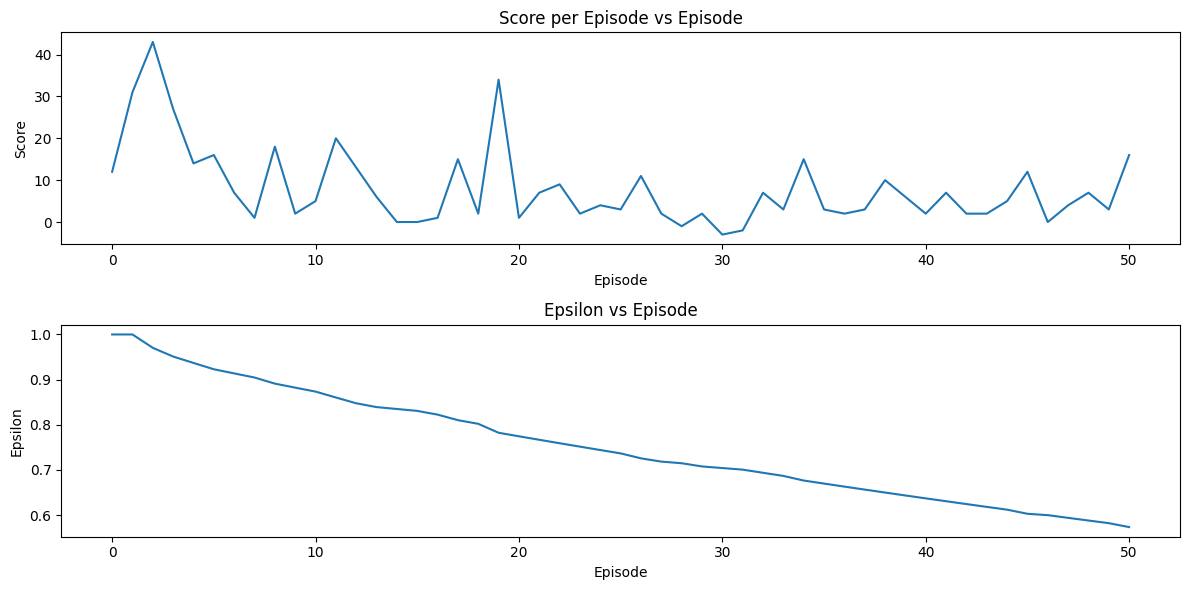

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 51/100 [14:51<14:20, 17.55s/it]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 52/100 [15:06<13:22, 16.72s/it]

episode: 51/100, score: 15, e: 0.57
1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 53/100 [15:38<16:45, 21.40s/it]

episode: 52/100, score: 31, e: 0.56
1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 54/100 [16:11<19:05, 24.91s/it]

episode: 53/100, score: 31, e: 0.55
1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 55/100 [16:30<17:09, 22.89s/it]

episode: 54/100, score: 18, e: 0.54
1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 56/100 [16:46<15:19, 20.90s/it]

episode: 55/100, score: 19, e: 0.53
1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 57/100 [17:08<15:16, 21.31s/it]

episode: 56/100, score: 26, e: 0.53
1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 58/100 [17:39<16:59, 24.27s/it]

episode: 57/100, score: 33, e: 0.52
1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 59/100 [18:05<16:52, 24.70s/it]

episode: 58/100, score: 26, e: 0.51
1/1 [==============================] - 0s 20ms/step


 60%|██████    | 60/100 [18:30<16:27, 24.69s/it]

episode: 59/100, score: 21, e: 0.5
1/1 [==============================] - 0s 18ms/step
episode: 60/100, score: 13, e: 0.5


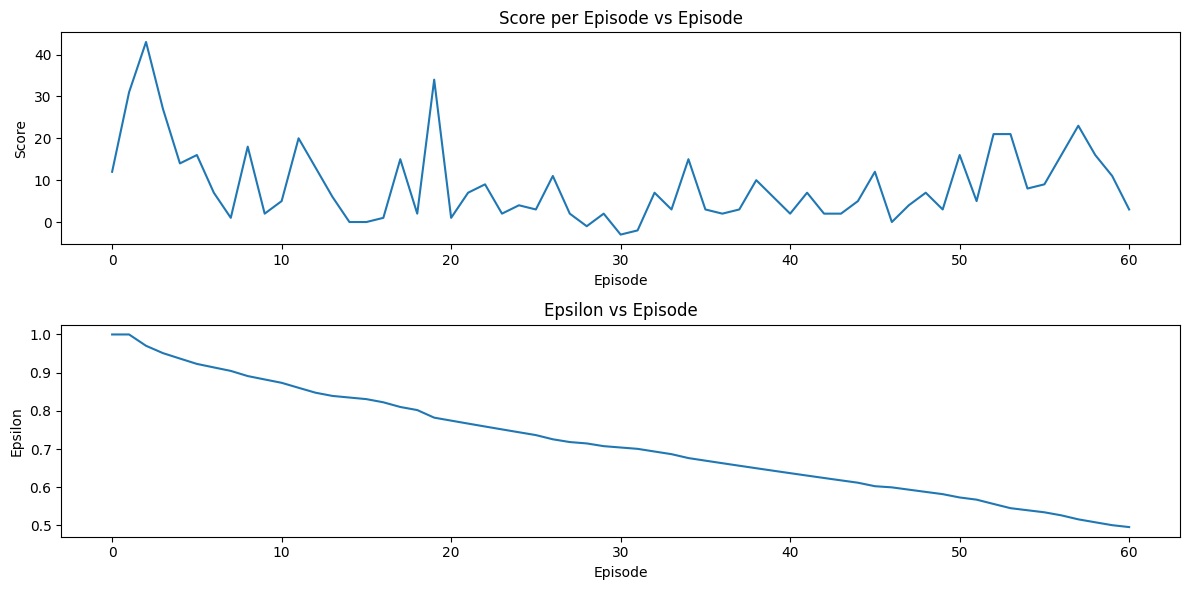

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 61/100 [18:46<14:28, 22.26s/it]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 62/100 [19:10<14:23, 22.72s/it]

episode: 61/100, score: 21, e: 0.49
1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 63/100 [19:34<14:15, 23.13s/it]

episode: 62/100, score: 22, e: 0.48
1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 64/100 [19:51<12:43, 21.21s/it]

episode: 63/100, score: 11, e: 0.48
1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 65/100 [20:13<12:32, 21.50s/it]

episode: 64/100, score: 23, e: 0.47
1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 66/100 [20:21<09:53, 17.44s/it]

episode: 65/100, score: 10, e: 0.47
1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 67/100 [20:29<07:59, 14.53s/it]

episode: 66/100, score: 8, e: 0.46
1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 68/100 [20:54<09:23, 17.60s/it]

episode: 67/100, score: 30, e: 0.46
1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 69/100 [21:10<08:52, 17.19s/it]

episode: 68/100, score: 15, e: 0.45
1/1 [==============================] - 0s 20ms/step


 70%|███████   | 70/100 [21:41<10:43, 21.44s/it]

episode: 69/100, score: 34, e: 0.44
1/1 [==============================] - 0s 20ms/step
episode: 70/100, score: 9, e: 0.44


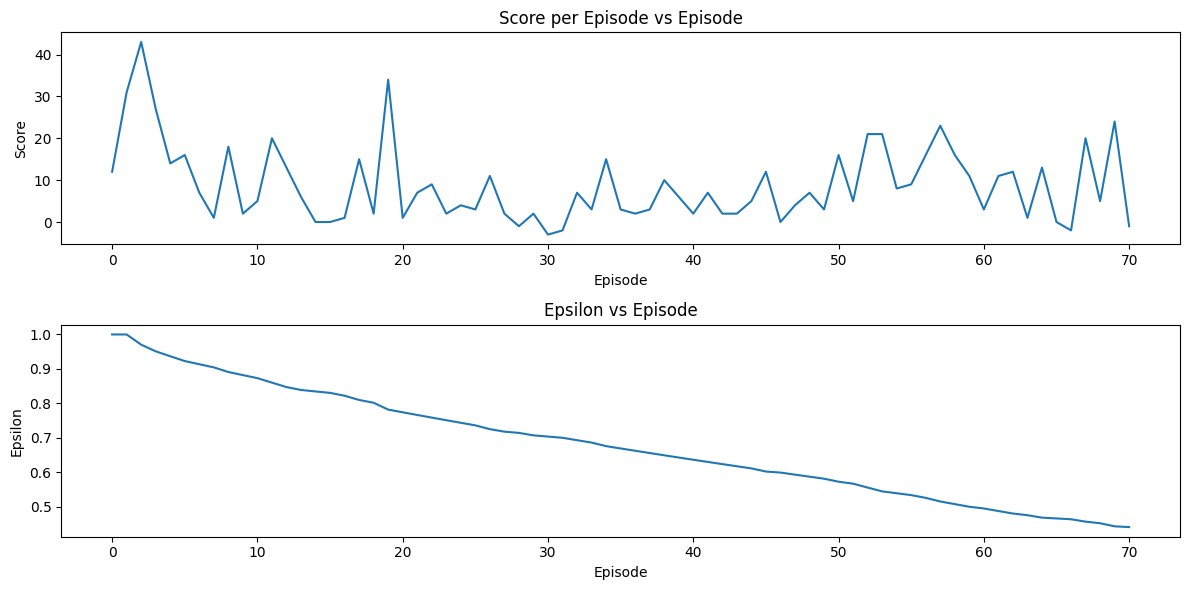

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 71/100 [21:51<08:37, 17.83s/it]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 72/100 [22:06<07:56, 17.01s/it]

episode: 71/100, score: 12, e: 0.44
1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 73/100 [22:21<07:27, 16.58s/it]

episode: 72/100, score: 13, e: 0.43
1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 74/100 [22:36<06:58, 16.10s/it]

episode: 73/100, score: 12, e: 0.43
1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 75/100 [22:52<06:36, 15.86s/it]

episode: 74/100, score: 15, e: 0.42
1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 76/100 [22:59<05:23, 13.46s/it]

episode: 75/100, score: 9, e: 0.42
1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 77/100 [23:08<04:33, 11.88s/it]

episode: 76/100, score: 9, e: 0.42
1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 78/100 [23:15<03:54, 10.65s/it]

episode: 77/100, score: 10, e: 0.42
1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 79/100 [23:31<04:14, 12.12s/it]

episode: 78/100, score: 15, e: 0.41
1/1 [==============================] - 0s 19ms/step


 80%|████████  | 80/100 [23:46<04:22, 13.10s/it]

episode: 79/100, score: 15, e: 0.41
1/1 [==============================] - 0s 19ms/step
episode: 80/100, score: 45, e: 0.4


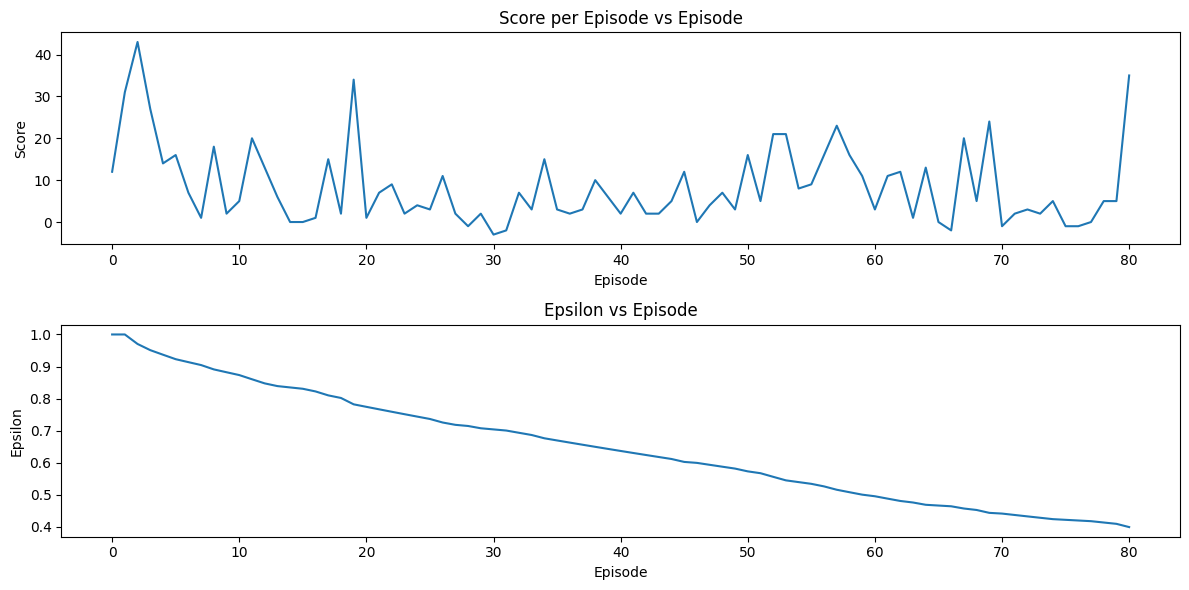

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 81/100 [24:27<06:47, 21.43s/it]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 82/100 [25:00<07:26, 24.78s/it]

episode: 81/100, score: 32, e: 0.39
1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 83/100 [25:51<09:15, 32.68s/it]

episode: 82/100, score: 56, e: 0.38
1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 84/100 [26:51<10:55, 40.96s/it]

episode: 83/100, score: 67, e: 0.37
1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 85/100 [27:40<10:49, 43.31s/it]

episode: 84/100, score: 56, e: 0.36
1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 86/100 [28:12<09:19, 39.94s/it]

episode: 85/100, score: 33, e: 0.35
1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 87/100 [28:37<07:39, 35.36s/it]

episode: 86/100, score: 28, e: 0.34
1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 88/100 [29:00<06:21, 31.80s/it]

episode: 87/100, score: 27, e: 0.34
1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 89/100 [30:01<07:26, 40.59s/it]

episode: 88/100, score: 78, e: 0.33
1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 90/100 [30:58<07:33, 45.37s/it]

episode: 89/100, score: 70, e: 0.31
1/1 [==============================] - 0s 21ms/step
episode: 90/100, score: 27, e: 0.31


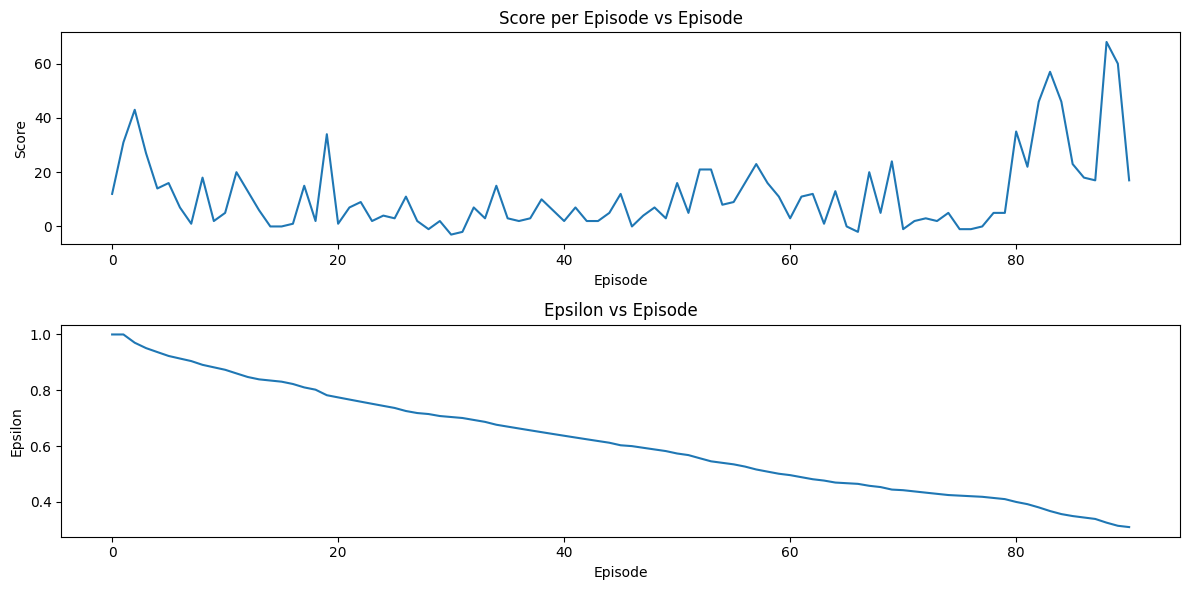

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 91/100 [31:22<05:52, 39.16s/it]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 92/100 [31:38<04:16, 32.08s/it]

episode: 91/100, score: 18, e: 0.31
1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 93/100 [31:54<03:10, 27.15s/it]

episode: 92/100, score: 19, e: 0.3
1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 94/100 [32:09<02:21, 23.55s/it]

episode: 93/100, score: 18, e: 0.3
1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 95/100 [32:47<02:20, 28.04s/it]

episode: 94/100, score: 49, e: 0.29
1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 96/100 [35:33<04:36, 69.24s/it]

episode: 95/100, score: 201, e: 0.26
1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 97/100 [36:36<03:22, 67.47s/it]

episode: 96/100, score: 79, e: 0.25
1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 98/100 [37:22<02:02, 61.14s/it]

episode: 97/100, score: 58, e: 0.25
1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 99/100 [38:31<01:03, 63.50s/it]

episode: 98/100, score: 85, e: 0.23
1/1 [==============================] - 0s 17ms/step


100%|██████████| 100/100 [39:02<00:00, 53.73s/it]

episode: 99/100, score: 39, e: 0.23


100%|██████████| 100/100 [39:02<00:00, 23.43s/it]


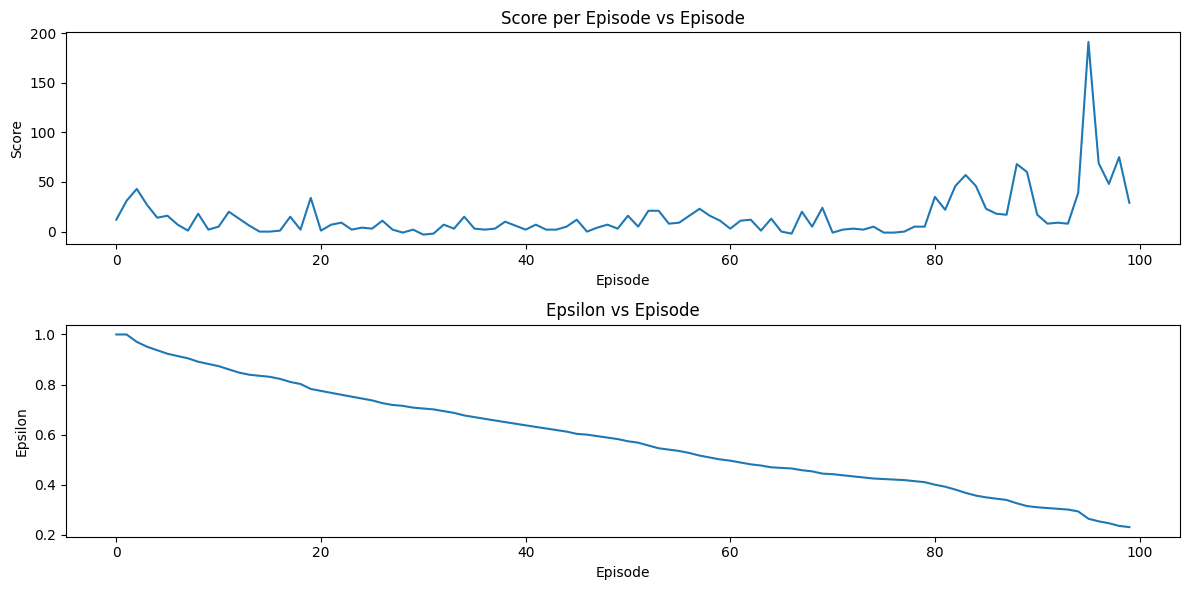

1/1 [==============================] - 0s 19ms/step


In [8]:
def main():
    env = gym.make('CartPole-v1', render_mode="rgb_array")
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    batch_size = 64
    num_episodes = 100

    # initialize arrays to keep track of rewards and epsilon
    scores = []
    epsilons = []

    for e in tqdm(range(num_episodes)):
        episode_score = 0
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(500):
            env.render()
            action = agent.act(state)
            next_state, reward, done, _, _ = env.step(action)
            reward = reward if not done else -10
            episode_score += reward
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
        
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, num_episodes, time, agent.epsilon))
                scores.append(episode_score)
                epsilons.append(agent.epsilon)
                if e % 10 == 0:
                    plot_metrics(scores, epsilons)
                    create_video(agent, env)
                    agent.save_weights()
                break
        
            if len(agent.memory) > batch_size and time % 10 == 0:
                agent.replay(batch_size)

    plot_metrics(scores, epsilons)
    create_video(agent, env)

    env.close()

if __name__ == "__main__":
    main()
